<a href="https://colab.research.google.com/github/vpolkampally0125/aaru/blob/main/Poisson_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import util as util

from linear_model import LinearModel

In [5]:
x_train, y_train = util.load_dataset('data/ds4_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset('data/ds4_valid.csv', add_intercept=True)

In [6]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def h(self, theta, x):
        """Vectorized implementation of h.

        :param theta: Shape (n,).
        :param x:     Training example inputs. Shape (m, n).
        :return:      The hypothesis of Poisson Regression, given by h(x) = exp(theta^T x). Shape (m,).
        """
        return np.exp(x @ theta)

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def next_step(theta):
            return self.step_size / m * x.T @ (y - self.h(theta, x))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            theta = np.zeros(n)
        else:
            theta = self.theta

        # Update theta
        step = next_step(theta)
        while np.linalg.norm(step, 1) >= self.eps:
            theta += step
            step = next_step(theta)

        self.theta = theta

    def predict(self, x):
        """Make a prediction given inputs x.

        :param x: Inputs of shape (m, n).
        :return   Floating-point prediction for each input, shape (m,).
        """

        return self.h(self.theta, x)

In [7]:
clf = PoissonRegression(step_size=2e-7)
clf.fit(x_train, y_train)

In [8]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')

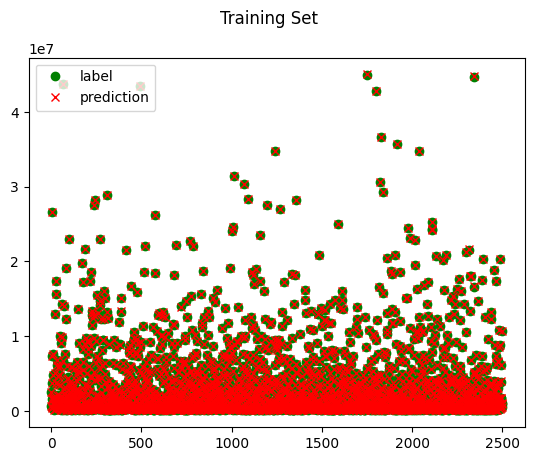

In [9]:
y_train_pred = clf.predict(x_train)
plot(y_train, y_train_pred, 'Training Set')

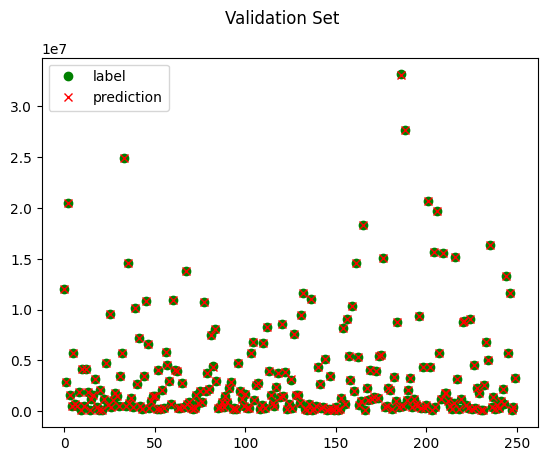

In [10]:
y_valid_pred = clf.predict(x_valid)
plot(y_valid, y_valid_pred, 'Validation Set')